In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_digits
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
from sklearn.metrics import f1_score, roc_auc_score, roc_curve, precision_recall_curve
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score


In [2]:
class MyFakeClassifier(BaseEstimator):
    def fit(self, X, y):
        pass
    def predict(self, X):
        return np.zeros( (len(X), 1), dtype = 'bool')
digits = load_digits()

y = (digits.target == 7).astype('int')
X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state = 42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1347, 64), (450, 64), (1347,), (450,))

In [7]:
clf = MyFakeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(pd.Series(y_test).value_counts(), accuracy_score(y_test, y_pred), confusion_matrix(y_test, y_pred), sep = '\n')

0    409
1     41
dtype: int64
0.9088888888888889
[[409   0]
 [ 41   0]]


In [4]:
confusion_matrix(y_test, y_pred)

array([[409,   0],
       [ 41,   0]], dtype=int64)

In [24]:
titanic = pd.read_csv('titanic.csv')

In [25]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [26]:
titanic.drop(['Name','Cabin', 'Ticket','Embarked'], axis = 1, inplace = True)
titanic.fillna(0, inplace = True)

#label encoding 
le = LabelEncoder()
titanic['Sex'] = le.fit_transform(titanic['Sex'])



feature_cols = titanic.columns.difference(['Survived'])
y = titanic['Survived']
x = titanic[feature_cols]
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state= 42)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((668, 7), (223, 7), (668,), (223,))

In [28]:
logit = LogisticRegression()
logit.fit(x_train, y_train)
y_pred = logit.predict(x_test)

C:\Users\EonKim\anaconda3\envs\geo\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [30]:

def get_score(y_test, y_pred):
    confusion = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    print('confusion matrix')
    print(confusion)
    print('acc : {0:.4f}, precision : {1:.4f}, recall : {2:.4f}'.format(accuracy, precision, recall))

get_score(y_test, y_pred)

confusion matrix
[[111  23]
 [ 28  61]]
acc : 0.7713, precision : 0.7262, recall : 0.6854


- TN FN
- FP TP 

In [36]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
pred_proba = rf.predict_proba(x_test)
result = np.concatenate([pred_proba, y_pred.reshape(-1, 1)], axis = 1)

array([[0.48, 0.52, 0.  ],
       [0.86, 0.14, 0.  ],
       [0.92, 0.08, 0.  ],
       [0.04, 0.96, 1.  ],
       [0.76, 0.24, 1.  ],
       [0.07, 0.93, 1.  ],
       [0.16, 0.84, 1.  ],
       [0.81, 0.19, 0.  ],
       [0.41, 0.59, 1.  ],
       [0.08, 0.92, 1.  ],
       [0.72, 0.28, 0.  ],
       [0.94, 0.06, 0.  ],
       [0.82, 0.18, 1.  ],
       [0.79, 0.21, 0.  ],
       [0.8 , 0.2 , 0.  ],
       [0.07, 0.93, 1.  ],
       [0.33, 0.67, 0.  ],
       [0.35, 0.65, 1.  ],
       [0.94, 0.06, 0.  ],
       [0.93, 0.07, 0.  ],
       [0.92, 0.08, 0.  ],
       [0.32, 0.68, 0.  ],
       [0.64, 0.36, 1.  ],
       [0.97, 0.03, 0.  ],
       [0.9 , 0.1 , 0.  ],
       [0.89, 0.11, 0.  ],
       [0.67, 0.33, 0.  ],
       [0.94, 0.06, 0.  ],
       [0.85, 0.15, 0.  ],
       [0.35, 0.65, 1.  ],
       [0.98, 0.02, 0.  ],
       [0.28, 0.72, 1.  ],
       [0.38, 0.62, 0.  ],
       [0.52, 0.48, 1.  ],
       [0.68, 0.32, 0.  ],
       [0.84, 0.16, 0.  ],
       [0.77, 0.23, 0.  ],
 

In [37]:
from sklearn.preprocessing import Binarizer
for threshold in [0.1, 0.2, 0.3, 0.4, 0.5]:
    success = pred_proba[:,-1].reshape(-1, 1)
    binarizer = Binarizer(threshold = threshold).fit_transform(success)
    binarizer
    get_score(y_test, binarizer)

confusion matrix
[[54 80]
 [ 5 84]]
acc : 0.6188, precision : 0.5122, recall : 0.9438
confusion matrix
[[82 52]
 [ 9 80]]
acc : 0.7265, precision : 0.6061, recall : 0.8989
confusion matrix
[[101  33]
 [ 13  76]]
acc : 0.7937, precision : 0.6972, recall : 0.8539
confusion matrix
[[110  24]
 [ 17  72]]
acc : 0.8161, precision : 0.7500, recall : 0.8090
confusion matrix
[[114  20]
 [ 23  66]]
acc : 0.8072, precision : 0.7674, recall : 0.7416


- precision_recall_curve
- output : precisions, recalls, thresholds

In [69]:
precisions, recalls, thresholds = precision_recall_curve(y_pred, success)

In [70]:
import matplotlib.pyplot as plt


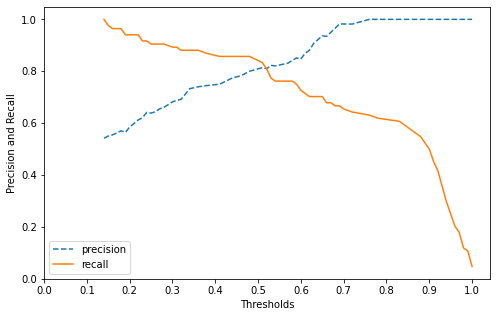

In [72]:
plt.figure(figsize = (8,5))
plt.plot(thresholds, precisions[0:thresholds.shape[0]], linestyle = '--', label = 'precision' )
plt.plot(thresholds, recalls[0:thresholds.shape[0]], label = 'recall')
plt.xticks(np.arange(0,1.1,0.1))
plt.xlabel('Thresholds') ; plt.ylabel('Precision and Recall')
plt.legend()
plt.show()

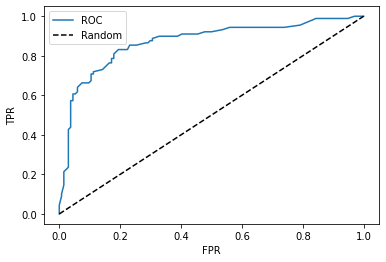

In [67]:
fprs, tprs, thresholds = roc_curve(y_test, success)

plt.plot(fprs, tprs, label = 'ROC')
plt.plot([0,1], [0,1], 'k--', label = 'Random')
plt.xlabel('FPR') ; plt.ylabel('TPR')
plt.legend()
plt.show()